# 《数据采集与清洗》
## 第一次作业内容： 网页抓取
### 具体目标：
+ 用``urllib.requests``库发起一次``get``请求，输出``response``文本信息；
+ 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息；
+ 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容；
+ 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果；
+ 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果；
+ (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。

### 注：
+ 代码要有注释，结果要有分析；
+ 本次作业提交截至时间：2020年3月10日(星期二)；
+ 文件命名规则: 班级号+学号+姓名+作业序号，示例：``1_20188989899_张三_1``；
+ 提交方式：1班发送至邮箱：632994085@qq.com；2班发送至邮箱：786888939@qq.com.

### 问题1：用``urllib.requests``库发起一次``get``请求，输出``response``文本信息。

In [10]:
# 这里编写代码

In [1]:
import requests
url = "https://www.baidu.com/more/" #爬取url的网址信息
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3673.0 Safari/537.36',}
#设置header，可以不设置
r = requests.get(url,headers = headers)

# html = resp.text
# print(html) 这个方式的输出会因为网页内容有中文二出现乱码

print(r.apparent_encoding) 
#此语句可从内容中分析出编码方式

#html = r.content.decode("utf-8")
#print(html)可代替下面的两行内容

r.encoding = 'utf-8' #设置编码格式
print(r.text)

utf-8

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="format-detection" content="telephone=no"/>
<meta name="viewport" content="width=device-width,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no"/>
<title>百度产品大全</title>
<style type="text/css">
body{margin:0;padding:7px 0 0;font-size:14px;font-family:Arial, Helvetica, sans-serif;position:relative;}
a{color:#0000cc;}
a:link{color:#0000cc}
img,ul,li,h3,form,table{margin:0;padding:0;border:0;list-style:none;}
#head{width:100%;border-bottom: 1px solid #ebebeb;}
.s_form:after,.s_tab:after{content:".";display:block;height:0;clear:both;visibility:hidden}
.s_form{zoom:1;width:1000px;height:55px;margin:0 auto;}
.logo{float:left;margin:7px 0 0;}
.logo img{width:101px;}
.fm{clear:none;position:relative;float:left; margin:11px 0 0 10px;}
.

* 这是一段比较基础的代码，此外requests库中的get（）函数还支持params字典编码。
* Response对象是Asp.Net应用程序中非常重要的一个内置对象，其作用为负责将服务器执行好的信息输出给客户端，即作用主要为响应客户端请求并将服务器的响应返回给用户，在页面的临时跳转中，也可使用Response.Redirect定向到另一个网址。可进行一下操作
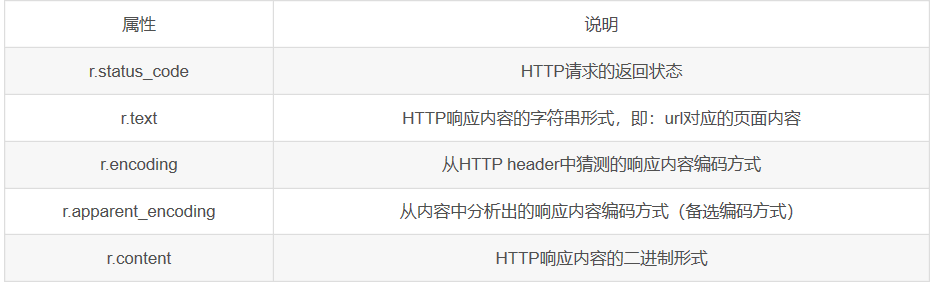

### 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息。

In [26]:
# 这里编写代码

In [2]:
url1 = 'https://fanyi.baidu.com/sug'#设置url，百度翻译
data = {'kw':'fate'}#设置post的data，其中fate是待翻译内容
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3673.0 Safari/537.36',}
#设置headers
re = requests.post(url1,data=data,headers=headers)#发送请求并获得内容
redata = re.json()#见获得的对象转化为json格式
#print(re)不能够输出文本
print(redata)

{'errno': 0, 'data': [{'k': 'fate', 'v': 'n. 命中注定的事(尤指坏事); 命运的安排; 命运; 天数; 定数; 天意;'}, {'k': 'fateful', 'v': 'adj. 对未来有重大(负面)影响的;'}, {'k': 'FATE', 'v': 'abbr. 部队战术应用鉴定(Force Application Tactics Evaluatio'}, {'k': 'fated', 'v': 'adj. 命中注定的; 命运决定的;'}, {'k': 'fates', 'v': 'n. 命中注定的事(尤指坏事); 命运的安排; 命运; 天数; 定数; 天意;  fate的第三人称'}]}


* 因为我使用的是谷歌浏览器使用使用的是谷歌的headers；
* 抓取百度翻译的接口地址事，百度出现了两个接口地址，实时翻译的（sug接口）和鼠标点击翻译后的接口（v2transapi接口）地址是不一样的一个是：http://fanyi.baidu.com/sug （能翻译英语到汉语），另一个是http://fanyi.baidu.com/v2transapi （但是抓取这个接口的sign值是个难题）
* 还有就是注意文本的转换，JSON(JavaScript Object Notation) 是一种轻量级的数据交换格式，易于人阅读和编写。

### 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容。 

In [3]:
# 这里编写代码

In [3]:
# 创建一个session对象
c = requests.Session()
# 用session对象发出get请求，设置cookies
c.get('http://httpbin.org/cookies/set/sessioncookie/20200310')
# 用session对象发出另外一个get请求，获取cookies
res = c.get("http://httpbin.org/cookies")
# 显示结果
res.text

'{\n  "cookies": {\n    "sessioncookie": "20200310"\n  }\n}\n'

* requests库的session对象能够帮我们跨请求保持某些参数，也会在同一个session实例发出的所有请求之间保持cookies。
* 设置的时候要注意网址的格式 
* requests库的session对象还能为我们提供请求方法的缺省数据，通过设置session对象的属性来实现。

### 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果。


In [4]:
# 这里编写代码

In [ ]:
# 这段代码参考了网上的资料，但是有部分代码我也还没有研究透彻。
import  urllib.request

import  urllib

import re #引入正则模块

#深度遍历使用栈
def  geteveryurl(data):#获取每一个url

    alllist=[] #总的url的集合

    mylist1=getallhttp(data)#url分组1

    mylist2=[] #url分组2

 
    if len(mylist1) >0:

        mylist2=getabsurl(  mylist1[0],data)#mylist[0]作用是提取元素

    alllist.extend(mylist1) # 将mylist1中的网址放入allist中

    alllist.extend(mylist2) # 同理

    return  alllist


def  getabsurl(url,data):

    try:

        regex=re.compile("href=\"(.*?)\"",re.IGNORECASE) #预编译提取href正则表达式

        httplist=regex.findall(data) #相匹配的全部字串，返回形式为数组

        newhttplist=httplist.copy()  #进行一次深拷贝，以进行后面的删除行为

        for data  in  newhttplist:

            if  data.find("http://")!=-1: #如果其中包含http

                httplist.remove(data) #在原list中remove此data

            if  data.find("javascript")!=-1: #同理 

                httplist.remove(data)

        hostname=gethostname(url)

        if hostname!=None: #若这个url存在

            for  i  in range(len(httplist)):

                httplist[i]=hostname+httplist[i] #将这个网址放入httolist中

        return httplist
    except:

        return []
def  gethostname(httpstr):

    try:

        mailregex = re.compile(r"(http://\S*?)/", re.IGNORECASE) #预编译提取主机名的regex

        mylist = mailregex.findall(httpstr) #相匹配的全部字串，返回形式为数组

        if  len(mylist)==0: 
            return None
        else:
            return mylist[0]
    except:
        return None


def  getallhttp(data):#找到所有的http
    try:

        mailregex = re.compile(r"(http://\S*?)[\"|>|)]", re.IGNORECASE) #预编译提取href正则表达式

        mylist = mailregex.findall(data) #相匹配的全部字串，返回形式为数组

        return mylist

    except:
        return [] 
def  getdata(url):

    try:

        data=urllib.request.urlopen(url).read().decode("utf-8") #设置返回值的编码方式
        return data  #没有异常返回字符串

    except:
        return "" #发生异常返回空


def  DFS(urlstr): # 进行不去重的深度遍历
    urlstack=[] #栈

    urlstack.append(urlstr)

    while len(urlstack)!=0:

        url=urlstack.pop()#栈弹出的数据

        print(url)#打印url链接

        newurllist=geteveryurl(getdata(url))#抓取所有的url

        if  len(newurllist)!=0:  #判断长度

            for urlstr in newurllist: #循环处理每一个url,

                if urlstr not in urlstack: #判断存在或者不存在

                    urlstack.append(urlstr)   #插入

DFS("http://www.baidu.com/more") 

http://www.baidu.com/more
http://www.w3.orghttps://cloud.baidu.com/
http://www.w3.orghttps://su.baidu.com
http://www.w3.orghttps://open2.baidu.com/
http://www.w3.orghttps://jiaoyu.baidu.com/topic/bsplatform/overview
http://www.w3.orghttps://trust.baidu.com/
http://www.w3.orghttps://jin.baidu.com/?channel=baidumore
http://www.w3.orghttps://www.baifubao.com/
http://www.w3.orghttps://anquan.baidu.com/forum
http://www.w3.orghttps://aipage.baidu.com/
http://www.w3.orghttps://quanmin.baidu.com/
http://www.w3.orghttps://dumall.baidu.com/?utm_source=baidu&utm_medium=all-products
http://www.w3.org#
http://www.w3.org/Consortium/Legal/ipr-notice
http://www.w3.org/Consortium/Legal/ipr-notice
http://www.w3.org/Consortium/Legal/ipr-notice
http://www.w3.org/Consortium/Legal/ipr-notice


* 深度遍历要用栈；
* 从源节点开始把节点按照深度放入栈，然后弹出
* 每弹出一个点，把该节点下一个没有进过栈的邻接点放入栈
* 直到栈变空
* 深度遍历不去重容易形成死循环；
* 在写代码的时候往往会忽略Urld不存在的情况，以后要注意。

### 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果。 

In [5]:
# 这里编写代码

In [ ]:
import  urllib.request

import  urllib

import re #引入正则模块
from collections import deque

#广度度遍历使用队列
def  geteveryurl(data):#获取每一个url

    alllist=[] #总的url的集合

    mylist1=getallhttp(data)#url分组1

    mylist2=[] #url分组2

 
    if len(mylist1) >0:

        mylist2=getabsurl(  mylist1[0],data)#mylist[0]作用是提取元素

    alllist.extend(mylist1) # 将mylist1中的网址放入allist中

    alllist.extend(mylist2) # 同理

    return  alllist


def  getabsurl(url,data):

    try:

        regex=re.compile("href=\"(.*?)\"",re.IGNORECASE) #预编译提取href正则表达式

        httplist=regex.findall(data) #相匹配的全部字串，返回形式为数组

        newhttplist=httplist.copy()  #进行一次深拷贝，以进行后面的删除行为

        for data  in  newhttplist:

            if  data.find("http://")!=-1: #如果其中包含http

                httplist.remove(data) #在原list中remove此data

            if  data.find("javascript")!=-1: #同理 

                httplist.remove(data)

        hostname=gethostname(url)

        if hostname!=None: #若这个url存在

            for  i  in range(len(httplist)):

                httplist[i]=hostname+httplist[i] #将这个网址放入httolist中

        return httplist
    except:

        return []
def  gethostname(httpstr):

    try:

        mailregex = re.compile(r"(http://\S*?)/", re.IGNORECASE) #预编译提取主机名的regex

        mylist = mailregex.findall(httpstr) #相匹配的全部字串，返回形式为数组

        if  len(mylist)==0: 
            return None
        else:
            return mylist[0]
    except:
        return None


def  getallhttp(data):#找到所有的http
    try:

        mailregex = re.compile(r"(http://\S*?)[\"|>|)]", re.IGNORECASE) #预编译提取href正则表达式

        mylist = mailregex.findall(data) #相匹配的全部字串，返回形式为数组

        return mylist

    except:
        return [] 
def  getdata(url):

    try:

        data=urllib.request.urlopen(url).read().decode("utf-8") #设置返回值的编码方式
        return data  #没有异常返回字符串

    except:
        return "" #发生异常返回空
def BFS(urlstr):
    urlqueue = deque([]) #新建一个队列
    
    urlqueue.append(urlstr) #队列中加入最初的url
    
    while len(urlqueue)!=0: #判断队列是否为空
        
        url = urlqueue.popleft()  #队列弹出的数据（url）
        
        print(url)  #打印url连接
        
        pagedata = getdata(url)  #获取网页源代码
    
        newurllist = geteveryurl(pagedata) #抓取该网页的所有的url
        
        if len(newurllist)!=0:      #若列表不为空
            
            for urlstr in newurllist:
                
                if urlstr not in urlqueue:
                    
                    urlqueue.append(urlstr)     #若url不在该队列中，则将该url加入队列中

BFS("http://www.baidu.com/more")


http://www.baidu.com/more
http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd
http://www.w3.org/1999/xhtml
http://www.baidu.com/more/'
http://www.baidu.com
http://www.baidu.com/search/jiqiao.html
http://www.baidu.com/
http://secr.baidu.com/
http://haokan.baidu.com
http://yingxiao.baidu.com
http://bit.baidu.com/
http://fanyi-pro.baidu.com/?from=bdmore
http://video.baidu.com/
http://fanyi.baidu.com/
http://music.taihe.com/
http://map.baidu.com/
http://news.baidu.com/
http://image.baidu.com/
http://stu.baidu.com
http://y.taihe.com
http://www.hao123.com/
http://site.baidu.com/
http://quzheng.baidu.com/
http://baijiahao.baidu.com/
http://developer.baidu.com/vcast
http://duer.baidu.com/
http://anquan.baidu.com/bbs/
http://wenku.baidu.com/
http://pan.baidu.com/
http://baike.baidu.com/
http://tieba.baidu.com/
http://zhidao.baidu.com/
http://jingyan.baidu.com/
http://yuedu.baidu.com/
http://test.baidu.com
http://cbbs.baidu.com
http://baobao.baidu.com
http://game.91.com/
http://youxi.baidu.c

* 整个的广度优先爬虫过程就是从一系列的种子节点开始，把这些网页中的"子节点"(也就是超链接)提取出来，放入队列中依次进行抓取。
* 去重——被处理过的链接需要放 入一张表(通常称为Visited表)中。每次新处理一个链接之前，需要查看这个链接是否已经存在于Visited表中
* DFS容易出现死循环现象，数据提取适合使用广度遍历实现，因为深度遍历是一撸到底，适合挖掘网站的层数。
* 广度优先有利于多爬虫的合作抓取，多爬虫合作通常先抓取站内链接，抓取的封闭性很强。

### (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。 

In [1]:
# 这里编写代码
#这段代码是去重的深度遍历封装
# 以下的代码其实和不去重的深度遍历相同，只是定义的是DFS1
import re
import urllib
import urllib.request
def  geteveryurl(data):#获取每一个url

    alllist=[] #总的url的集合

    mylist1=getallhttp(data)#url分组1

    mylist2=[] #url分组2

 
    if len(mylist1) >0:

        mylist2=getabsurl(  mylist1[0],data)#mylist[0]作用是提取元素

    alllist.extend(mylist1) # 将mylist1中的网址放入allist中

    alllist.extend(mylist2) # 同理

    return  alllist


def  getabsurl(url,data):

    try:

        regex=re.compile("href=\"(.*?)\"",re.IGNORECASE) #预编译提取href正则表达式

        httplist=regex.findall(data) #相匹配的全部字串，返回形式为数组

        newhttplist=httplist.copy()  #进行一次深拷贝，以进行后面的删除行为

        for data  in  newhttplist:

            if  data.find("http://")!=-1: #如果其中包含http

                httplist.remove(data) #在原list中remove此data

            if  data.find("javascript")!=-1: #同理 

                httplist.remove(data)

        hostname=gethostname(url)

        if hostname!=None: #若这个url存在

            for  i  in range(len(httplist)):

                httplist[i]=hostname+httplist[i] #将这个网址放入httolist中

        return httplist
    except:

        return []
def  gethostname(httpstr):

    try:

        mailregex = re.compile(r"(http://\S*?)/", re.IGNORECASE) #预编译提取主机名的regex

        mylist = mailregex.findall(httpstr) #相匹配的全部字串，返回形式为数组

        if  len(mylist)==0: 
            return None
        else:
            return mylist[0]
    except:
        return None


def  getallhttp(data):#找到所有的http
    try:

        mailregex = re.compile(r"(http://\S*?)[\"|>|)]", re.IGNORECASE) #预编译提取href正则表达式

        mylist = mailregex.findall(data) #相匹配的全部字串，返回形式为数组

        return mylist

    except:
        return [] 
def  getdata(url):

    try:

        data=urllib.request.urlopen(url).read().decode("utf-8") #设置返回值的编码方式
        return data  #没有异常返回字符串

    except:
        return "" #发生异常返回空

def DFS1(urlstr):# 以上的代码其实和不去重的深度遍历相同
    visitlist = [] #代表已经访问过的url，防止深度遍历出现死循环
    urlstack=[]         #栈
    urlstack.append(urlstr)
    while len(urlstack)!=0:
        url = urlstack.pop()
        print(url)  #打印url链接
        if url not in visitlist:
            pagedata = getdata(url)
            newurllist = geteveryurl(pagedata)
            if len(newurllist)!=0:
                for urlstr in newurllist :
                    if urlstr not in urlstack:
                        urlstack.append(urlstr)
            visitlist.append(url)        

In [ ]:
DFS1("http://www.baidu.com/more")  

http://www.baidu.com/more
http://www.w3.orghttps://cloud.baidu.com/
http://www.w3.orghttps://su.baidu.com
http://www.w3.orghttps://open2.baidu.com/
http://www.w3.orghttps://jiaoyu.baidu.com/topic/bsplatform/overview
http://www.w3.orghttps://trust.baidu.com/
http://www.w3.orghttps://jin.baidu.com/?channel=baidumore
http://www.w3.orghttps://www.baifubao.com/
http://www.w3.orghttps://anquan.baidu.com/forum
http://www.w3.orghttps://aipage.baidu.com/
http://www.w3.orghttps://quanmin.baidu.com/
http://www.w3.orghttps://dumall.baidu.com/?utm_source=baidu&utm_medium=all-products
http://www.w3.org#
http://www.w3.org/Consortium/Legal/ipr-notice
http://www.w3.org/Consortium/Legal/ipr-notice
http://www.w3.org/Mail/


* DFS容易出现死循环现象，故使用visitlist来避免